**VIDEO GAME RECOMMENDER SYSTEM WITH NEURAL NETWORKS**

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
game_reviews = pd.read_csv('ratings.csv', sep=',')

In [13]:
print (game_reviews.shape)

(29826315, 3)


The dataset comprises **29.826.314** video game ownerships.

In [14]:
game_reviews.head()

,id,rate,appid
0,76561197960265729,1.0,10
1,76561197960265729,1.0,20
2,76561197960265729,1.0,30
3,76561197960265729,1.0,40
4,76561197960265729,1.0,50


In [15]:
game_reviews["rate"].describe()

count    2.982632e+07
mean     1.307054e+00
std      8.556772e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.100000e+00
max      5.950000e+00
Name: rate, dtype: float64

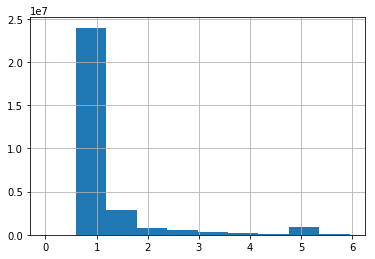

In [16]:
game_reviews["rate"].hist(bins=10)

The median of the dataset is 1.

In [25]:
users = game_reviews.id.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
games = game_reviews.appid.unique()
game_map = {i:val for i,val in enumerate(games)}
inverse_game_map = {val:i for i,val in enumerate(games)}

game_reviews["id"] = game_reviews["id"].map(inverse_user_map)
game_reviews["old_id"] = game_reviews["appid"] # copying for join with metadata
game_reviews["appid"] = game_reviews["appid"].map(inverse_game_map)

print ("We have % users", users.shape[0])
print ("We have % games", games.shape[0])

We have % users 642335
We have % games 18834


In [30]:
users_nb = game_reviews['id'].value_counts().reset_index()
users_nb.columns= ['id','nb_lines']
users_nb['nb_lines'].describe()

count    642335.000000
mean         46.434205
std         144.256427
min           1.000000
25%           5.000000
50%          13.000000
75%          30.000000
max       14874.000000
Name: nb_lines, dtype: float64

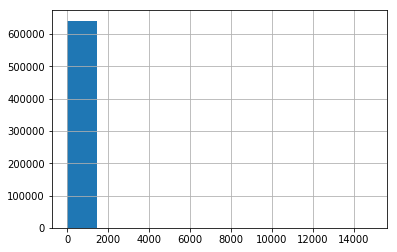

In [31]:
import seaborn
users_nb['nb_lines'].hist()

In [32]:
a = game_reviews.dropna()[['id','rate','appid']]